In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from maddpg import MADDPGAgent, Actor
from sample_env import SampleEnv


In [98]:
agent = MADDPGAgent()
models = torch.load(r'maddpg_2\80000.th')

agent.actor[0].load_state_dict(models[0])
agent.actor[1].load_state_dict(models[1])

<All keys matched successfully>

In [99]:
location = []
env = SampleEnv()
state = env.reset()
done = False
total_reward = [0, 0]
while not done:
    location.append(np.copy(env.state))
    actions = agent.choose_actions(state)
    next_state, rewards, done, _ = env.step(actions)       
    state = next_state
    for i in range(2):
        total_reward[i] += rewards[i]

print(total_reward)

[94.50552521119538, 97.58394557687274]


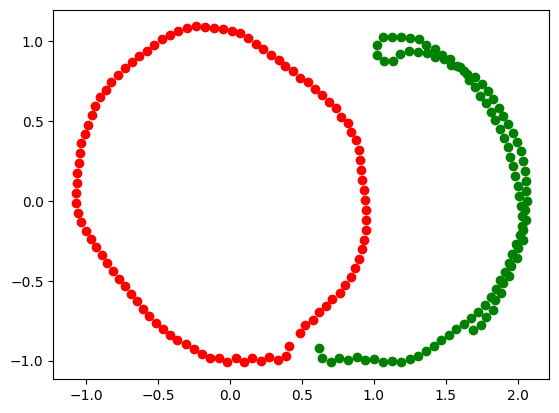

In [100]:
l = np.array(location)
# plt.xlim(-1, 2)
# plt.ylim(-1, 1)
plt.scatter(l[:, 0, 0], l[:, 0, 1], c='r')
plt.scatter(l[:, 1, 0], l[:, 1, 1], c='g')


In [1]:
# l

In [2]:
# m1 = torch.load(r'maddpg\79000.th')
# m2 = torch.load(r'maddpg\80000.th')
# torch.abs(m1[0]['fc.0.weight'] - m2[0]['fc.0.weight']) < 1e-4